# PART 2 - Analyse en Composantes Principales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import du dataset

In [2]:
with open('data/part1.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,True
1,113.29,2.87,4.01,103.74,103.70,171.67,True
2,113.84,2.88,4.40,103.76,103.76,171.83,True
3,113.63,3.12,3.73,103.78,103.65,171.80,True
4,113.55,2.27,5.04,103.70,103.75,172.05,True
5,113.16,2.99,4.54,104.65,104.44,172.57,True
6,113.30,2.90,3.97,103.55,103.80,172.38,True
7,113.38,3.19,3.54,103.65,103.37,171.58,True
8,113.53,3.33,4.06,103.51,103.75,171.96,True
9,112.47,3.02,4.63,104.34,104.20,172.14,True


# Analyse en composantes principales

In [3]:
features = ['length', 'margin_up', 'margin_low', 'height_left', 'height_right', 'diagonal']

# Séparation des features
x = df.loc[:, features].values
# Séparation de 'is_genuine'
y = df.loc[:,['is_genuine']].values
# Standardisation des features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['F1', 'F2'])

finalDf = pd.concat([principalDf, df[['is_genuine']]], axis = 1)

finalDf.head(10)

,F1,F2,is_genuine
0,2.153639,1.599709,True
1,-2.110416,-0.526039,True
2,-1.973152,-0.048102,True
3,-2.059795,-0.089105,True
4,-2.403180,0.412170,True
5,1.235656,2.983191,True
6,-2.079412,1.147980,True
7,-2.623934,-1.040133,True
8,-1.736309,-0.227631,True
9,0.727490,1.063881,True


Text(0.5, 1.0, 'Variances des dimensions')

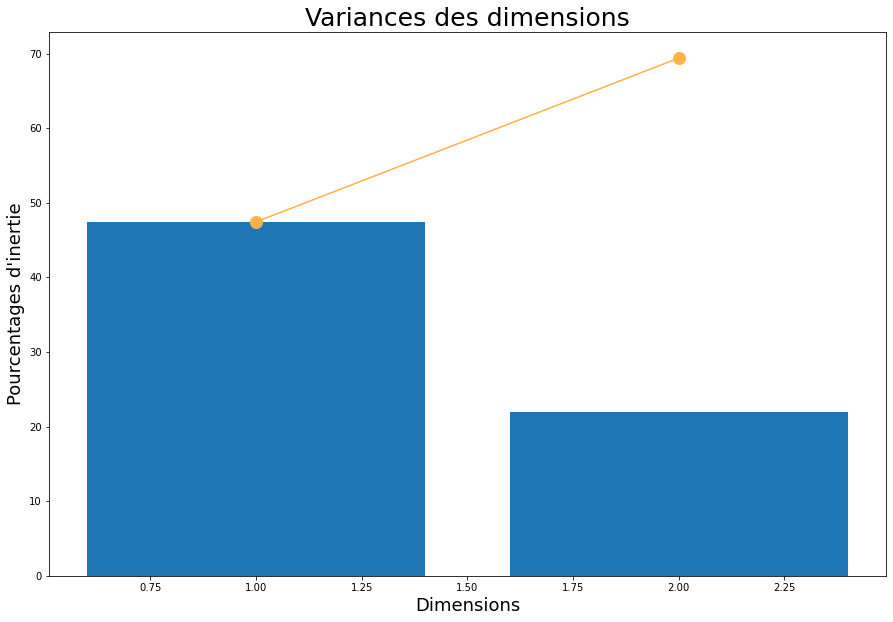

In [4]:
# Visualisation du diagramme d'éboulis des valeurs propre.
scree = pca.explained_variance_ratio_*100
ax = plt.subplots(figsize=(15,10))
plt.bar(np.arange(len(scree))+1, scree, zorder=2)
plt.plot(
        np.arange(len(scree))+1,
        scree.cumsum(),
        c="#FFB246",
        marker='o',
        markersize=12
        )
plt.xlabel("Dimensions",fontsize=18)
plt.ylabel("Pourcentages d'inertie",fontsize=18)
plt.title("Variances des dimensions",fontsize=25)

Text(0.5, 1.0, 'Cercle de corrélation sur F1 et F2')

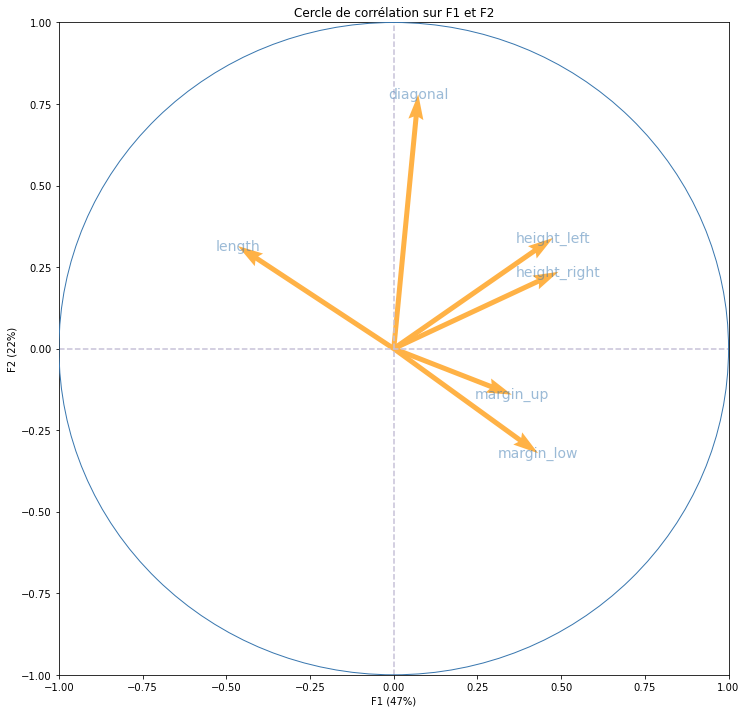

In [5]:
# Projection du cercle des corrélations F1 & F2
ax2 = plt.subplots(figsize=(12,12))
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='#3977af', zorder=3)
plt.gca().add_artist(circle)
plt.quiver(np.zeros(pca.components_.shape[1]), np.zeros(pca.components_.shape[1]),
               pca.components_[0,:], pca.components_[1,:], 
               angles='xy', scale_units='xy', scale=1, color="#FFB246")
for i,(x, y) in enumerate(pca.components_[[0,1]].T):
    if x >= -1 and x <= 1 and y >= -1 and y <= 1 :
        plt.text(x, y, features[i], fontsize='14', ha='center', va='center', rotation=0, color="#3977af", alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot([-1, 1], [0, 0], color='#c6c1d8', ls='--')
plt.plot([0, 0], [-1, 1], color='#c6c1d8', ls='--')
plt.xlabel(f"F1 ({pca.explained_variance_ratio_[0]:.0%})")
plt.ylabel(f"F2 ({pca.explained_variance_ratio_[1]:.0%})")
plt.title("Cercle de corrélation sur F1 et F2")

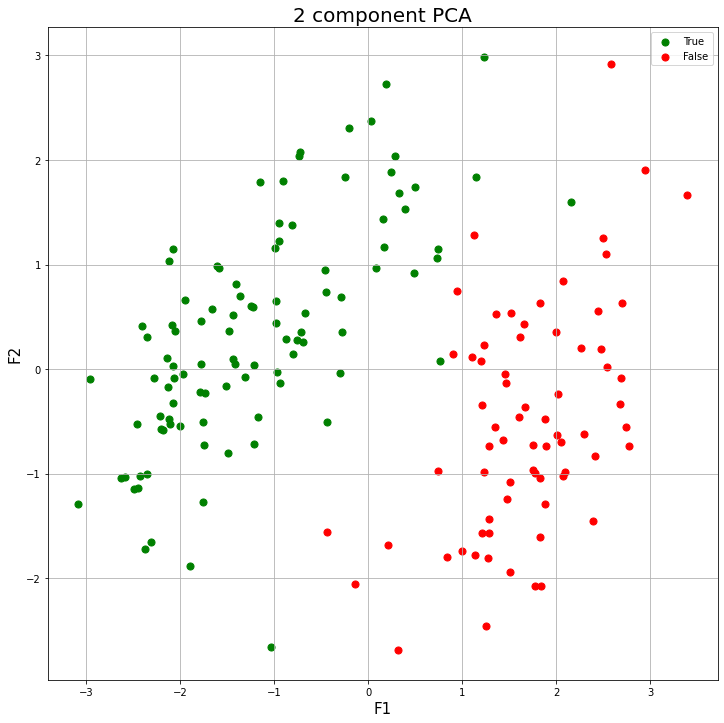

In [6]:
# Projection sur le plan factoriel
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('F1', fontsize = 15)
ax.set_ylabel('F2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['is_genuine'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'F1']
               , finalDf.loc[indicesToKeep, 'F2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Interprétations
F1 : Longueur du billet VS hauteur / marge  
F2 : Longueur de la diagonale  
  
Je n'ai conservé que cette projection car elle est de loin la plus pertinente.  
On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie.  
Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.  
On voit qu'une diagonale sépare clairement les vrais et les faux billets.  
F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.  

# Sauvegarde du jeu de données

In [7]:
with open('data/part2.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)